In [27]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
def saturation_temperature(pressure):
    pvc = [-51.574, 0.20636, -0.29381e-3, 0.2231e-6, -0.86184e-10, 1.3299e-14]
    tlo = 400.0
    thi = 1800.0
    for j in range(100):
        temp = (tlo+thi)/2.0
        pv = pvc[5]
        for i in range(4,-1,-1):
            pv = temp*pv + pvc[i]
        pv = 10.0*math.exp(pv)  
        #print(j,temp,pv,pressure)
        if (abs(pv-pressure) < 0.001):
            break
        if (pv < pressure):
            tlo = temp
        else:
            thi = temp
    return temp

In [3]:
def fmax(fmx,spec_heat_ratio, inlet_mach):
    phi = (.3403/fmx**0.255)**2
    if (inlet_mach > 1.0):
        phi = (1.0286*math.exp(2.4938*fmx))**2
    for i in range(50):
        checkval = (spec_heat_ratio+1.0)*phi/2./(1.0+(spec_heat_ratio-1.0)/2.*phi)
        f = (1.0-phi)/spec_heat_ratio/phi+(spec_heat_ratio+1.0)/2./spec_heat_ratio*math.log((spec_heat_ratio+1.0)*phi/2./(1.0+(spec_heat_ratio-1.0)/2.*phi))-fmx
        if (abs(f)<0.0001):
            break
        df = (spec_heat_ratio+1.0)/(2.*spec_heat_ratio*phi*(1.0+(spec_heat_ratio-1.0)/2.*phi)) - 1.0/spec_heat_ratio/phi**2
        df1 = (spec_heat_ratio+1.0)/(2.*spec_heat_ratio*phi*(1.0+(spec_heat_ratio-1.0)/2.*phi))
        df2 = 1.0/spec_heat_ratio/phi**2
        phi_new = phi - f/df
        if (phi_new <= 0.0):
            phi_new = 1e-6
        if (inlet_mach < 1.0 and phi_new > 1.0):
            phi_new = 0.9999
        if (inlet_mach >= 1.0 and phi_new < 1.0):
            phi_new = 1.0001
        phi = phi_new
    exit_mach = math.sqrt(phi)
    return exit_mach

In [4]:
def pressure_ratio(mach, spec_heat_ratio):
    pressr = math.sqrt((spec_heat_ratio+1.0)/2./(1.0+(spec_heat_ratio-1.0)/2.*mach**2))/mach
    return pressr

In [5]:
def flmax(mach, spec_heat_ratio):
    fl = (1.0-mach**2)/spec_heat_ratio/mach**2+(spec_heat_ratio+1.0)/2./spec_heat_ratio*math.log((spec_heat_ratio+1.0)*mach**2/2./(1.0+(spec_heat_ratio-1.0)/2.*mach**2))
    return fl

In [6]:
def friction(reynolds):
    if (reynolds>2000 and reynolds <= 20000):
        f= 0.079/reynolds**0.25
    elif (reynolds>20000):
        f = 0.046/reynolds**.2
    else:
        f = 16.0/reynolds
    return f

In [7]:
def fluid_properties(temp):
    #coefficients for potassium
    pvc = [-51.574, 0.20636, -0.29381e-3, 0.2231e-6, -0.86184e-10, 1.3299e-14]
    rholc = [940.43, -0.42954, 0.42662e-3, -0.42981e-6, 0.19884e-9, -3.4521e-14]
    mulc = [0.0016193, -0.55722e-5,0.87656e-8, -0.70683e-11, 2.8447e-15, -4.5263e-19]
    muvc = [0.54558e-5, 0.69661e-8, 0.30725e-10, -3.9354e-14, 1.9365e-17, -3.5469e-21]
    sigc = [0.13127, -6.6e-5, 2.7756e-17, -5.7598e-20, 1.7371e-23, -5.0487e-27]
    hfgc = [2226400.0, 135.36, -0.60104, 0.15934e-3, 0.42749e-7, -0.20228e-10]
    rhovc = [-0.60872e2, 0.19765, -0.28146e-3, 0.21319e-6, -0.82191e-10, 0.1268e-13]
    ctlc = [0.68968e2, -0.36091e-1, -0.35049e-4, 0.60981e-7, -0.34141e-10, 0.66235e-14]
    mwc = 39.1
    rkc = [1.7402, -0.1238e-3]
    pv = pvc[5]
    rhol = rholc[5]
    mul = mulc[5]
    muv = muvc[5]
    sig = sigc[5]
    hfg = hfgc[5]
    rhov = rhovc[5]
    cfluid = ctlc[5]
    for i in range(4,-1,-1):
        pv = temp*pv + pvc[i]
        rhol = temp*rhol + rholc[i]
        mul = temp*mul + mulc[i]
        muv = temp*muv + muvc[i]
        sig = temp*sig + sigc[i]
        hfg = temp*hfg + hfgc[i]
        rhov = temp*rhov + rhovc[i]
        cfluid = temp*cfluid + ctlc[i]
    mw = mwc
    rk = rkc[0]+temp*rkc[1]
    pv = 10.0*math.exp(pv)
    rhol = 0.001*rhol
    muv = 10.0*muv
    hfg = 0.001*hfg
    sig = 1000.0*sig
    rhov = 0.001*math.exp(rhov)
    mul = 10.0*mul
    return pv, rhol, mul, muv, sig, hfg, rhov, cfluid, mw, rk

In [8]:
def dpe_evap(q_total):
    q = q_total / 2.0
    qhfg = q/hfg
    qhfgt = q_total/hfg
    dple = 6.0*mu_l*qhfg*le/(math.pi*rv*a**3*rho_l)
    dv = 2*rv #math.sqrt(4.0*av/math.pi)  #diameter
    vy = qhfgt/rho_v/av
    reyv = 4.0*qhfgt/math.pi/mu_v/dv
    rrn = qhfgt/2./math.pi/le/mu_v
    psi = 0.61*rrn+0.61*rrn/(3.6+rrn) # velocity profile correction factor C
    avis = 16.0/reyv*le/dv
    beta= avis*psi
    dpve = avis*(qhfgt/av)**2/rho_v
    dpie = (qhfgt/av)**2*beta/rho_v
    return dpie,dpve,dple

In [9]:
def dpa_adiab(temp, q_total):
    qhfg = q_total/hfg
    dpla = 6.0*mu_l*qhfg*la/(math.pi*rv*a**3*rho_l)
    rm1 = qhfg/av/rho_v/math.sqrt(rbar*temp/mw)  #mach number at exit
    rey = 4.0*qhfg/math.pi/2.0/rv/mu_v
    f = friction(rey)
    if (rm1 > 0.2):
        fl2 = flmax(rm1,rk)-4.0*f*la/2.0/rv
        rm2 = 1.0
        if (fl2 > 0.0):
            rm2 = fmax(fl2,rk,rm1)
    else:
        rm2 = rm1
    if (rm2 > 0.3):
        pr = pressure_ratio(rm1,rk)/pressure_ratio(rm2,rk)
        if (pr <1.0 or pr > 2.08):
            pr = 2.08
        pa2 = pv/pr
        dpa = (pv-pa2)/2.0
    else:
        dpa = 2.0*f*la/(2.0*rv)*qhfg**2/rho_v/av**2
        pa2 = pv-dpa
    tbc = saturation_temperature(pa2)
    return dpla, dpa

In [10]:
def dpc_cond(q_total):
    qhfg = q_total/hfg
    qa = q1_array[i]
    qb = q1_array[i+1]
    lc1 = lc/cinc
    cfract = (distance[i]-le-la)/lc
    qrad = qa-qb
    qhfg1 = (qa+qb)/(2.0*hfg)
    dplc = 6.0*mu_l*qhfg1*lc1/(math.pi*rv*a**3*rho_l)
    rreyc = -qhfg/2.0/math.pi/lc1/mu_v
    reyc = 4.0*qhfg1/math.pi/2.0/rv/mu_v
    vci = qa/hfg/av/rho_v
    vcii = qb/hfg/av/rho_v
    #Busse correction not yet added, check Reynolds
    f = friction(reyc)
    dpvc = 4.0*f*(lc1/2.0)*rho_v*vci**2/(4.0*rv)
    lparam = (2.0*le+4.0*la)/lc
    recov = (rreyc+2.0)/(1.23*rreyc-lparam)
    dpic = -(vci**2-vcii**2)*rho_v*recov
    return dpic, dpvc, dplc

In [11]:
def sonic_limit(temp, q_total):
    pv, rho_l, mu_l, mu_v, sig, hfg, rho_v, cfluid, mw, rk = fluid_properties(temp)
    qs = q_total/hfg
    for i in range(10):
        reys = 4.0*qs/math.pi/2.0/rv/mu_v
        f = friction(reys)
        fli = 4.0*f*la/2.0/rv
        rmis = fmax(fli,rk,0.0)
        w1 = rmis*math.sqrt(rbar*temp/mw)
        rreys = reys*rv/4.0/le
        ab = 1.22+1.22/(3.6+rreys)
        dpvs = 8.0*mu_v*w1/rv**2*le/2.0
        dpis = rho_v*ab*w1**2
        pos = pv + dpis + dpvs
        te_sonic = saturation_temperature(pos)
        q_sonic = math.sqrt(rho_v*pv)*av*hfg*rmis
        pci = pv/pressure_ratio(rmis,rk)
        tc_sonic = saturation_temperature(pci)
        if abs(q_sonic-qs*hfg)<1.0:
            break
        else:
            qs = q_sonic/hfg
    return q_sonic, pci, tc_sonic

In [12]:
def entrainment_limit(temp,pci,tc_sonic):
    pv, rho_l, mu_l, mu_v, sig, hfg, rho_v, cfluid, mw, rk = fluid_properties(temp)
    tcie = tc_sonic
    p2e = pci
    z = wire_radius
    for i in range(10):
        rhov1 = mw*p2e/(rbar*tcie)
        w2e = math.sqrt(2.0*math.pi/z/rhov1)
        rm2e = w2e/math.sqrt(rk*rbar/mw*tcie)
        if rm2e > 1.0:
            rm2e = 1.0
        reye = 2.0*rv*rhov1*w2e/mu_v
        f = friction(reye)
        fl2e = 4.0*f*la/2.0/rv
        fl1e = fl2e + flmax(rm2e,rk)
        rm1e = fmax(fl1e,rk,0.0)
        p2e = pv*pressure_ratio(rm2e,rk)/pressure_ratio(rm1e,rk)
        tcie2 = saturation_temperature(p2e)
        if abs(tcie2-tcie)<1.0:
            break
        else:
            tcie = tcie2
    qentrn = math.sqrt(2.0*math.pi*rhov1*sig/z)*hfg*av
    return qentrn

In [13]:
def boiling_limit(temp):
    pv, rho_l, mu_l, mu_v, sig, hfg, rho_v, cfluid, mw, rk = fluid_properties(temp)
    rnuc = 0.00127  #nucleation site radius
    dtboil = 2.0*sig*temp/(rho_v*hfg*rnuc)
    rkw = eff_pore_radius*cfluid + (1.0-eff_pore_radius)*k_wick
    a1 = 2.0*math.pi*radius_in*le
    dtloq = a/(a1*rkw)
    alv = 2.0*math.pi*(radius_in-a)*le*eff_pore_radius
    r = rbar/mw
    dtlv = (2.0*math.pi)**0.5*r**1.5*temp**2.5/(alv*pv*hfg**2)
    qboil = dtboil/(dtloq+dtlv)
    return qboil

In [14]:
t_sink = 300
q_total = 15122 #total power in watts
le = 50.0
la = 20.0
lc = 50.0
cinc = 10 #increment in condenser
ainc = 6
einc = 10
#qe_array = [1500.0,3500.0,5000.0,3500.0,1500.0]
qe_array = [1500,1500,1500,1500,1500,1500,1500,1500,1500,1500]
q_total = sum(qe_array)
print('q total = ', q_total)
theta = 0.0  #inclination angle
radius_in = 1.75 
wick_porosity = 0.6
k_wick = 0.13
k_wall = 0.13
nucl_radius = 0.00127
radius_out = 1.9
screen_thickness = 0.1
wire_radius = 0.002
annulus_thickness = 0.1
eff_pore_radius = 0.004
h_sink = 0.05
rbar = 8.314e7
grav = 980.0

a = annulus_thickness
cond_area = 2*math.pi*lc*radius_out/cinc #condenser area for each mesh, acondi
abd = math.log(radius_out/radius_in)
abc = math.log(radius_in/(radius_in-annulus_thickness))

icondb = einc+ainc+1 #index of beginning of condenser
iconde = einc+ainc+cinc #index of end of condenser
iadiab = einc+ainc
if (t_sink > 400.0):   #for potassium
    tlow = t_sink
else:
    tlow = 400.0
thigh = 1800.0  # for potassium

q total =  15000


In [15]:
total_mesh = cinc+ainc+einc+1
distance = np.zeros(total_mesh)
dpi_array = np.zeros(total_mesh)
dpv_array = np.zeros(total_mesh)
dpl_array = np.zeros(total_mesh)
dpv_total = np.zeros(total_mesh)
dpa_array = np.zeros(total_mesh)
dp_array = np.zeros(total_mesh)
q1_array = np.zeros(total_mesh)
pvap = np.zeros(total_mesh)
tempx = np.zeros(total_mesh)
for i in range(einc+1):
    distance[i] = i*le/einc
for i in range(einc+1,einc+ainc+1):
    distance[i] = le + (i-(einc))*la/ainc
for i in range(einc+ainc+1,total_mesh):
    distance[i] = le + la + (i-(einc+ainc))*lc/cinc
#only once
rv = radius_in - annulus_thickness - screen_thickness
b = (radius_in+rv+screen_thickness)*math.pi
av = math.pi*rv*rv
rh = a*b/(a+b)
al = a*b
#iteration on T evaporator exit
for k in range(20):
    tguess = (thigh+tlow)/2  # guess temperature at the end of evaporator, iterate until q in equals q out
    ### EVAPORATOR
    pv, rho_l, mu_l, mu_v, sig, hfg, rho_v, cfluid, mw, rk = fluid_properties(tguess)
    #conduction heat sink
    rcond = (1/h_sink+radius_out*abd/k_wall+radius_in/cfluid*abc)/cond_area  #heat transfer from inside to outside
    dpie,dpve,dple = dpe_evap(q_total)
    dpe = dpie+dpve
    pvap[0] = pv + dpe
    tempx[0]= saturation_temperature(pvap[0])
    for i in range(1,einc+1):  #boundary 1 to 5
        q1_array[i] = q1_array[i-1]+qe_array[i-1]
        dpie,dpve,dple = dpe_evap(q1_array[i])
        dpi_array[i] = dpie
        dpv_array[i] = dpve
        dpl_array[i] = dple
        dpe = dpi_array[i]+dpv_array[i]
        pvap[i] = pvap[0]-dpe
        tempx[i] =saturation_temperature(pvap[i])
        dpv_total[i] = dpv_array[i]+dpi_array[i]+dpa_array[i]
    ### ADIABATIC
    dpla, dpa = dpa_adiab(tguess, q_total)
    # print(k," -- DPLA: ",dpla," , DPA: ",dpa)
    for i in range (einc+1,iadiab+1):  # boundary 6 and 8
        afract = (distance[i]-le)/la
        dpa_array[i] = dpa*afract
        dpl_array[i] = dpl_array[i-1] + dpla/ainc
        q1_array[i] = q1_array[i-1]
        dpi_array[i] = dpi_array[i-1]
        dpv_array[i] = dpv_array[i-1]
        pvap[i] = pvap[einc] - dpa_array[i]
        tempx[i] = saturation_temperature(pvap[i])
        dpv_total[i] = dpv_array[i]+dpi_array[i]+dpa_array[i]
    pvap[icondb-1] = pv-dpa
    tempx[icondb-1] = saturation_temperature(pvap[icondb-1])
    q1_array[icondb-1] = q_total
    ### CONDENSOR - convective coupling
    qcond = 0.0
    for i in range(icondb-1,iconde):
        qout = (tempx[i]-t_sink)/rcond   #heat out in mesh i
        if (qout < 0.0):    #if t_sink > tempx, guess temperature is too high
            print('ierror 2')
            thigh = tguess
            break
        qcond = qcond + qout
        q1_array[i+1] = q1_array[i]-qout
        dpic,dpvc, dplc = dpc_cond(q_total)
        dpc = dpic+dpvc
        ### end of dpcond
        pvap[i+1] = pvap[i]-dpc
        if (pvap[i+1] < 0.0):
            print('ierror 3')
            break
        tempx[i+1] = saturation_temperature(pvap[i+1])
        pv, rho_l, mu_l, mu_v, sig, hfg, rho_v, cfluid, mw, rk = fluid_properties(tempx[i+1])
        #conduction heat sink
        rcond = (1/h_sink+radius_out*abd/k_wall+radius_in/cfluid*abc)/cond_area  #heat transfer from inside to outside
        dpi_array[i+1] = dpi_array[i]+dpic
        dpv_array[i+1] = dpv_array[i]+dpvc
        dpa_array[i+1] = dpa_array[i]
        dpl_array[i+1] = dpl_array[i]+dplc
        dpv_total[i+1] = dpv_total[i]+dpc
    if abs((qcond-q_total)/q_total)<0.001:
        print('Converged ', k, qcond, q_total, tguess)
        break
    elif (qcond > q_total):
        thigh = tguess
    else:
        tlow = tguess
    print('iteration ', k, qcond,q_total, tguess)
#add limit checks
# capillary, sonic, boiling and entrainment limits
if (min(pvap) < max(dpv_total)):
    print('Capillary limit exceeded')
q_sonic, pci, tc_sonic = sonic_limit(tguess,q_total)
if (q_total > q_sonic):
    print('Sonic limit exceeded')
q_entrn = entrainment_limit(tguess, pci,tc_sonic)
if (q_total > q_entrn):
    print('Entrainment limit exceeded')
q_boil = boiling_limit(tguess)
print(q_boil)

iteration  0 22519.897547410583 15000 1100.0
iteration  1 13188.88302185201 15000 750.0
iteration  2 17610.88592290223 15000 925.0
iteration  3 15229.329443486495 15000 837.5
iteration  4 14065.034168474267 15000 793.75
iteration  5 14663.496878278545 15000 815.625
iteration  6 14944.721303636947 15000 826.5625
iteration  7 15086.520376528226 15000 832.03125
iteration  8 15015.498341645682 15000 829.296875
iteration  9 14980.080033865455 15000 827.9296875
Converged  10 14997.781621746022 15000 828.61328125
4604.259966005878


In [16]:
fmt = '{:{f}}  {:{f}}  {:{f}}  {:{f}}'
for i in range(total_mesh):
    print(fmt.format(distance[i],tempx[i],q1_array[i],dpv_total[i], f='8.2f'))

    0.00    842.42      0.00      0.00
    5.00    842.27   1500.00    239.52
   10.00    841.87   3000.00    887.09
   15.00    841.21   4500.00   1940.08
   20.00    840.29   6000.00   3398.33
   25.00    839.10   7500.00   5261.80
   30.00    837.63   9000.00   7530.48
   35.00    835.87  10500.00  10204.36
   40.00    833.79  12000.00  13283.43
   45.00    831.38  13500.00  16767.70
   50.00    828.61  15000.00  20657.17
   53.33    828.42  15000.00  20917.33
   56.67    828.24  15000.00  21177.49
   60.00    828.05  15000.00  21437.66
   63.33    827.86  15000.00  21697.82
   66.67    827.67  15000.00  21957.99
   70.00    827.48  15000.00  22218.15
   75.00    829.18  13515.19  19874.16
   80.00    830.68  12025.58  17771.04
   85.00    831.97  10531.75  15932.87
   90.00    833.06   9034.30  14351.24
   95.00    833.97   7533.76  13019.73
  100.00    834.71   6030.66  11933.68
  105.00    835.28   4525.48  11089.96
  110.00    835.68   3018.71  10486.92
  115.00    835.92   1510

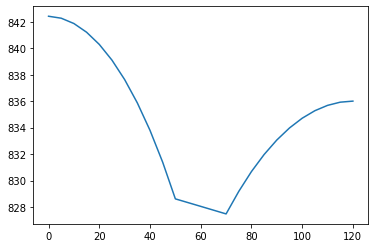

In [28]:
plt.plot(distance,tempx)

In [17]:
q1_array

array([0.00000000e+00, 1.50000000e+03, 3.00000000e+03, 4.50000000e+03,
       6.00000000e+03, 7.50000000e+03, 9.00000000e+03, 1.05000000e+04,
       1.20000000e+04, 1.35000000e+04, 1.50000000e+04, 1.50000000e+04,
       1.50000000e+04, 1.50000000e+04, 1.50000000e+04, 1.50000000e+04,
       1.50000000e+04, 1.35151857e+04, 1.20255794e+04, 1.05317527e+04,
       9.03429596e+03, 7.53375834e+03, 6.03065666e+03, 4.52548316e+03,
       3.01871205e+03, 1.51080536e+03, 2.21837825e+00])

In [18]:
distance

array([  0.        ,   5.        ,  10.        ,  15.        ,
        20.        ,  25.        ,  30.        ,  35.        ,
        40.        ,  45.        ,  50.        ,  53.33333333,
        56.66666667,  60.        ,  63.33333333,  66.66666667,
        70.        ,  75.        ,  80.        ,  85.        ,
        90.        ,  95.        , 100.        , 105.        ,
       110.        , 115.        , 120.        ])

In [19]:
dpv_total

array([    0.        ,   239.52118553,   887.08616132,  1940.07747016,
        3398.32936848,  5261.80190444,  7530.48061215, 10204.35898447,
       13283.43366146, 16767.70273294, 20657.16503268, 20917.32979706,
       21177.49456144, 21437.65932583, 21697.82409021, 21957.9888546 ,
       22218.15361898, 19874.15730999, 17771.04164421, 15932.87413134,
       14351.24175132, 13019.733026  , 11933.67534151, 11089.95663971,
       10486.91899455, 10124.32670328, 10004.44640073])

In [20]:
pvap

array([117877.75202884, 117638.23084332, 116990.66586752, 115937.67455869,
       114479.42266037, 112615.9501244 , 110347.2714167 , 107673.39304438,
       104594.31836738, 101110.0492959 ,  97220.58699617,  96960.42223178,
        96700.2574674 ,  96440.09270301,  96179.92793863,  95919.76317425,
        95659.59840986,  98003.59471885, 100106.71038464, 101944.87789751,
       103526.51027753, 104858.01900284, 105944.07668733, 106787.79538913,
       107390.83303429, 107753.42532556, 107873.30562811])

In [21]:
dpi_array

array([    0.        ,   214.5738756 ,   837.19154147,  1865.23554038,
        3298.54012878,  5137.06535482,  7380.7967526 , 10029.72781499,
       13083.85518207, 16543.17694362, 20407.69193343, 20407.69193343,
       20407.69193343, 20407.69193343, 20407.69193343, 20407.69193343,
       20407.69193343, 17876.50999083, 15618.29544476, 13655.82052926,
       11976.97240847, 10571.89987085,  9432.66741194,  8553.0005592 ,
        7928.10024634,  7554.51172246,  7430.03837074])

In [22]:
dpv_array

array([   0.        ,   24.94730992,   49.89461985,   74.84192977,
         99.7892397 ,  124.73654962,  149.68385955,  174.63116947,
        199.5784794 ,  224.52578932,  249.47309925,  249.47309925,
        249.47309925,  249.47309925,  249.47309925,  249.47309925,
        249.47309925,  436.65873286,  591.75761314,  716.06501577,
        813.28075654,  886.84456884,  940.01934326,  975.96749421,
        997.8301619 , 1008.82639451, 1013.41944369])

In [23]:
dpa_array

array([   0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,  260.16476438,
        520.32952877,  780.49429315, 1040.65905754, 1300.82382192,
       1560.98858631, 1560.98858631, 1560.98858631, 1560.98858631,
       1560.98858631, 1560.98858631, 1560.98858631, 1560.98858631,
       1560.98858631, 1560.98858631, 1560.98858631])

In [24]:
dpl_array

array([   0.        ,   52.20368437,  104.40736874,  156.61105311,
        208.81473748,  261.01842185,  313.22210622,  365.42579059,
        417.62947496,  469.83315933,  522.0368437 ,  591.6417562 ,
        661.24666869,  730.85158119,  800.45649368,  870.06140617,
        939.66631867, 1038.90616906, 1127.76211827, 1206.16371706,
       1274.11307611, 1331.61126663, 1378.65866371, 1415.25519672,
       1441.40053061, 1457.09419371, 1462.3356625 ])